The purpose of this notebook is to extend off of LST_new_approach.ipynb, showing how the same code can be used to follow the entire sky.

Note: the code in this notebook has to be redone slightly since we changed the format in which sky_over_time returns.

In [2]:
%matplotlib inline
import skyflux as sf

Missing flux value for: GLEAM J202818-254302 at frequency: 204 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 212 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 220 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 227 MHz.
Missing spectral index for: GLEAM J202818-254302


//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

In [ ]:
# Set up a healpy interpolator

#! I think we will have to revisit these values to expand the healpy
    # interpolator, once we have tested it out at least once.
    # For example: is our current interpolator set-up covering the entire sky?

nside = 128

theta, phi = hp.pix2ang(nside,np.arange(12 * nside * nside))

list_az = phi
list_alt = np.pi / 2 - theta
#J = sf.stokes.spline_beam_func(151e6, alt, az)

# Not 100% sure about this lack of LST arg
J = sf.stokes.create_J(az=list_az, alt=list_alt, nu=151e6, radians=True)
J_abs = np.abs(J)

In [4]:
# test visibility over time function
# we are expecting an array of 4x1 complex vectors

#assert False, "this cell is currently too dangerous to run"

cold_patch = sf.vis.sources_over_time(88, 121, list_sources=None,
                                        start=0, end=2/3 * np.pi, interval=np.pi / 72, nu=151)

In [ ]:
plt.plot(np.abs(cold_patch[:, 0]), label="I")
plt.plot(np.abs(cold_patch[:, 1]), label="Q")
plt.plot(np.abs(cold_patch[:, 2]), label="U")
plt.plot(np.abs(cold_patch[:, 3]), label="V")

plt.xlabel("Index")
plt.ylabel("Jy?")
plt.title("Full catalog; Cold patch; Visibility Magnitudes")

plt.legend()

plt.show()

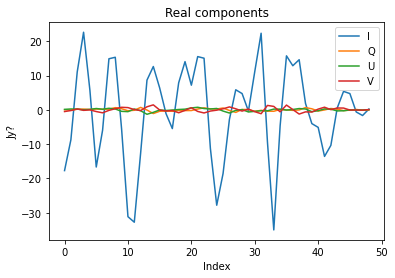

In [5]:
plt.plot(np.real(cold_patch[:, 0]), label="I")
plt.plot(np.real(cold_patch[:, 1]), label="Q")
plt.plot(np.real(cold_patch[:, 2]), label="U")
plt.plot(np.real(cold_patch[:, 3]), label="V")

plt.xlabel("Index")
plt.ylabel("Jy?")
plt.title("Full catalog; Cold patch; Real Components")

plt.legend()

plt.show()

In [ ]:
plt.plot(np.imag(cold_patch[:, 0]), label="I")
plt.plot(np.imag(cold_patch[:, 1]), label="Q")
plt.plot(np.imag(cold_patch[:, 2]), label="U")
plt.plot(np.imag(cold_patch[:, 3]), label="V")

plt.xlabel("Index")
plt.ylabel("Jy?")
plt.title("Full catalog; Cold patch; Imaginary Components")

plt.legend()

plt.show()